In [1]:
# packages
# standard
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import csv
from pprint import pprint


In [2]:
# load data and first glance
df = pd.read_csv('csiro_alt_gmsl_mo_2015_csv.csv')#boyut kontol
df.shape
df.head(5)

,Time,GMSL
0,1993-01-15,-1.6
1,1993-02-15,-3.4
2,1993-03-15,5.5
3,1993-04-15,0.1
4,1993-05-15,5.3


In [3]:
df.dtypes #sayısal verilerin veri tiplerinin kontrolü

Time     object
GMSL    float64
dtype: object

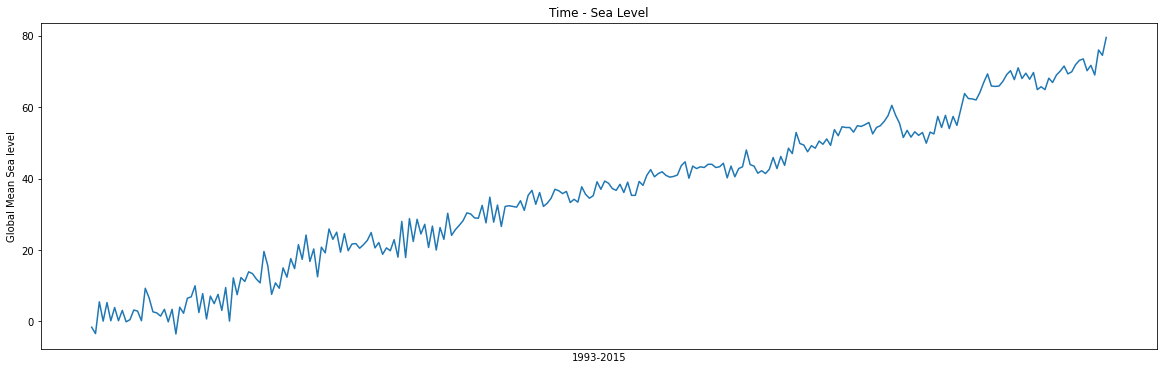

In [4]:
plt.figure(figsize=(20,6))

plt.plot(df.Time,df.GMSL) #Zamana göre GMSL değerlerinin grafiği
plt.title("Time - Sea Level")

plt.xlabel("1993-2015")
plt.ylabel("Global Mean Sea level")

length=0                                       #çok fazla yıl değeri olduğu için x eksenin karışık ve iç içe geçmiş gözüküyordu.
xmarks=[i for i in range(1,length+1,1)]        #bu yüzden yıl değerleri gizlendi   
plt.xticks(xmarks)

plt.show()


In [5]:
df['GMSL'].mean() #Sea level niteliğinin ortalaması, sonuç: 36.02


36.02857142857143

In [6]:
a=df.sort_values('GMSL', axis = 0, ascending = False) #sea level max değerler top5
a.head(5) 


,Time,GMSL
265,2015-02-15,79.5
263,2014-12-15,76.0
264,2015-01-15,74.5
259,2014-08-15,73.5
258,2014-07-15,73.1


In [7]:
a.tail(5) #sea level min değerler top5

,Time,GMSL
9,1993-10-15,-0.1
20,1994-09-15,-0.1
0,1993-01-15,-1.6
1,1993-02-15,-3.4
22,1994-11-15,-3.5


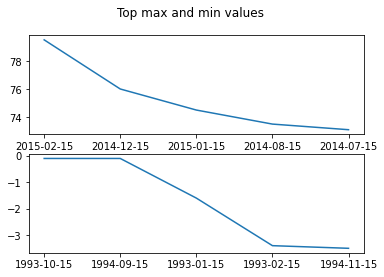

In [8]:
fig, axs = plt.subplots(2)             
fig.suptitle('Top max and min values') 
axs[0].plot(a.head(5).Time,a.head(5).GMSL)
axs[1].plot(a.tail(5).Time,a.tail(5).GMSL)


In [9]:
df.GMSL.pct_change().sort_values() #Öncelikle, pct_change() fonksiyonu ile deniz seviyesi artma oranlarına bakıyoruz.
                                   #sort_values() fonksiyonu ile oranları sıralıyoruz. Buradan min ve max değerleri ve 
                                   #konumlarını tespit ediyoruz.

21    -35.000000
10     -6.000000
2      -2.617647
23     -2.142857
22     -2.029412
         ...    
6      18.500000
14     45.500000
4      52.000000
37    121.000000
0            NaN
Name: GMSL, Length: 266, dtype: float64

In [10]:
df.values[37] #values[] yardımıyla tespit edilen konumda istenilen tarihe ulaşıyoruz.
              #15 şubat 1996 max difference... 0.1->12.2 en fazla artış

array(['1996-02-15', 12.2], dtype=object)

In [11]:
df.values[21]  #values[] yardımıyla tespit edilen konumda istenilen tarihe ulaşıyoruz.
               #15 kasım 1994 min difference... 3.4->3.5 en az artış

array(['1994-10-15', 3.4], dtype=object)

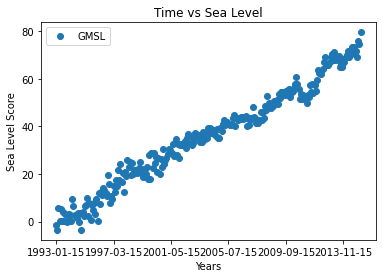

In [12]:
df.plot(x='Time', y='GMSL', style='o')
plt.title('Time vs Sea Level')
plt.xlabel('Years')
plt.ylabel('Sea Level Score')
plt.show()

In [13]:
import time
import datetime
from datetime import datetime as dt

def convert_date_to_ordinal(date):
    return dt.strptime(date, '%Y-%m-%d').toordinal()

df['dt_ordinal'] = df['Time'].apply(lambda x: convert_date_to_ordinal(x))
df

,Time,GMSL,dt_ordinal
0,1993-01-15,-1.6,727578
1,1993-02-15,-3.4,727609
2,1993-03-15,5.5,727637
3,1993-04-15,0.1,727668
4,1993-05-15,5.3,727698
...,...,...,...
261,2014-10-15,71.7,735521
262,2014-11-15,69.0,735552
263,2014-12-15,76.0,735582
264,2015-01-15,74.5,735613


In [14]:
X= df.dt_ordinal.to_numpy().reshape(-1,1)

Y= df.GMSL

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [17]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=regressor.predict(x_test)
print(regressor.score(x_test,y_test))


0.9707020555962621


In [39]:
print('Coefficients: ', regressor.coef_)

Coefficients:  [0.00884439]


In [41]:
print('Variance score: {}'.format(regressor.score(x_test, y_test)))


Variance score: 0.9707020555962621


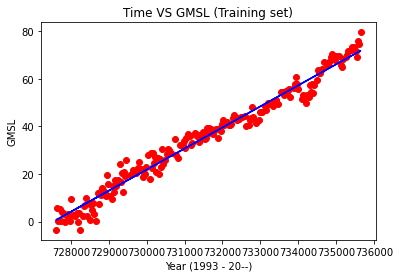

In [47]:
viz_train = plt
viz_train.scatter(x_train, y_train, color='red')
viz_train.plot(x_train, regressor.predict(x_train), color='blue')
viz_train.title('Time VS GMSL (Training set)')
viz_train.xlabel('Year (1993 - 20--)')
viz_train.ylabel('GMSL')
viz_train.show()